# YOLOv8 EDA Notebook

In [15]:
import os
from IPython.display import display, Image
from IPython import display
from PIL import Image
import ultralytics
from ultralytics import YOLO
import matplotlib.pyplot as plt

### Models - Nano(n)/Small(s)/Medium(m)/Large(l)/ExtraLarge(x)

 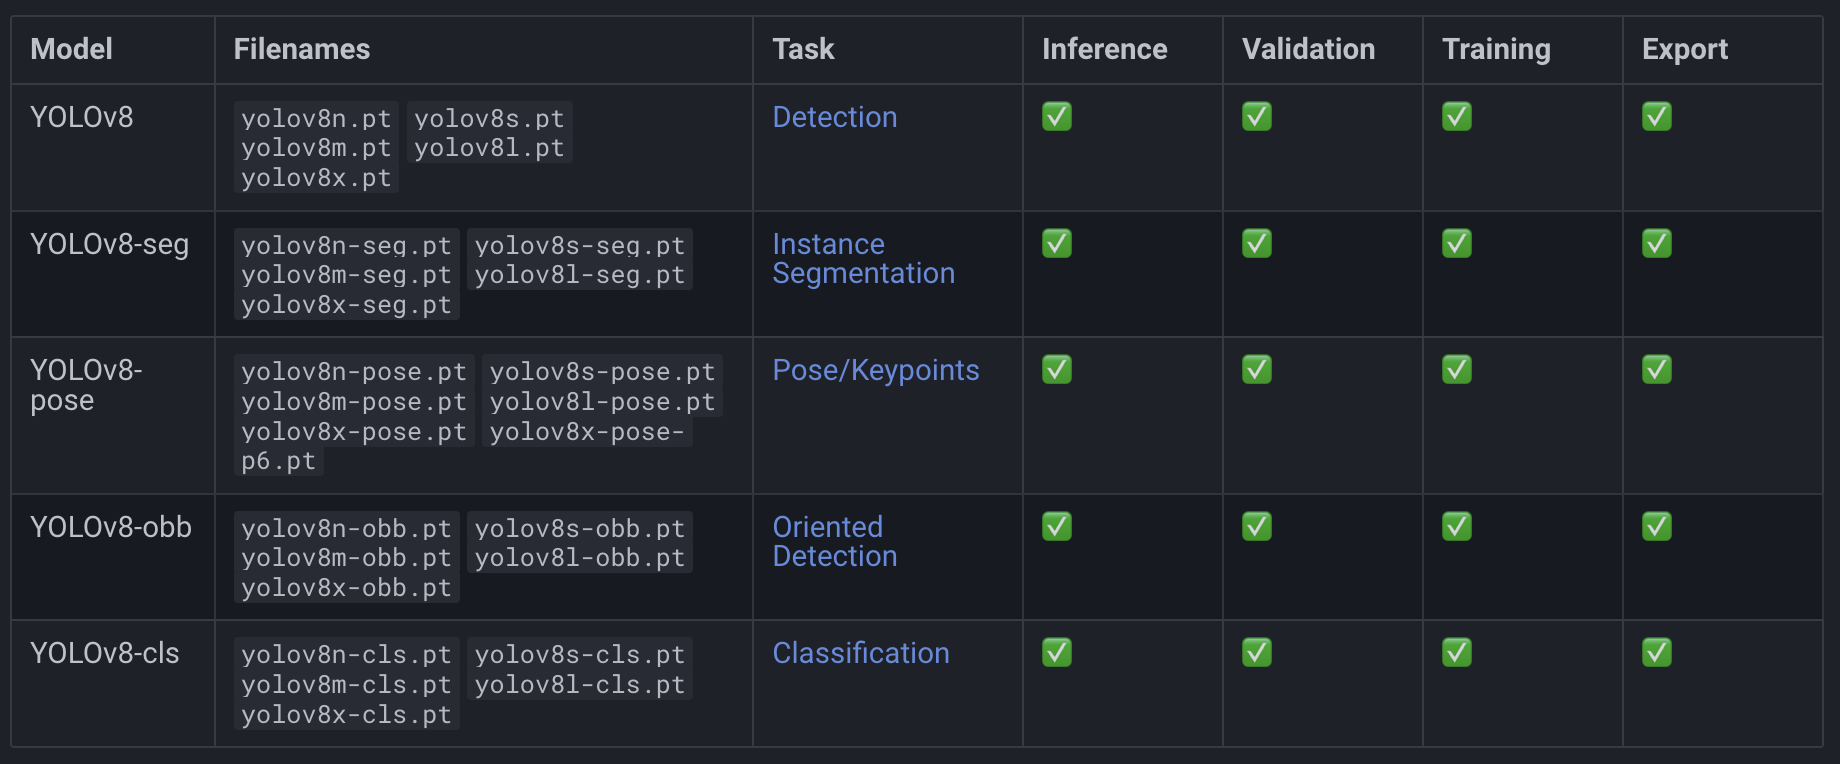

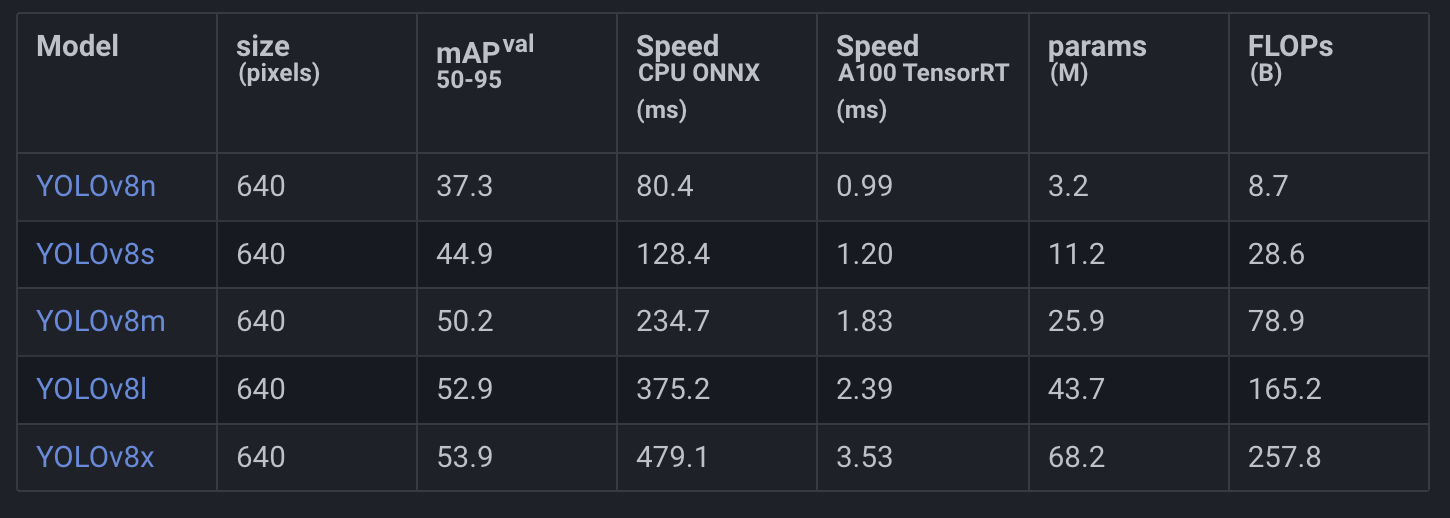

In [16]:
ultralytics.checks()

Ultralytics YOLOv8.1.24 🚀 Python-3.10.6 torch-2.2.1 CPU (Apple M2)
Setup complete ✅ (8 CPUs, 8.0 GB RAM, 184.5/228.3 GB disk)


In [17]:
# Load a pretrained YOLOv8n model
model = YOLO('yolov8n.pt')

In [18]:
model.type

<bound method Module.type of YOLO(
  (model): DetectionModel(
    (model): Sequential(
      (0): Conv(
        (conv): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(16, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (1): Conv(
        (conv): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (2): C2f(
        (cv1): Conv(
          (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
          (act): SiLU(inplace=True)
        )
        (cv2): Conv(
          (conv): Conv2d(48, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(32, eps=0.001, momentum=0.03,

In [19]:
model.info()

YOLOv8n summary: 225 layers, 3157200 parameters, 0 gradients, 8.9 GFLOPs


(225, 3157200, 0, 8.8575488)

In [20]:
model.names

{0: 'person',
 1: 'bicycle',
 2: 'car',
 3: 'motorcycle',
 4: 'airplane',
 5: 'bus',
 6: 'train',
 7: 'truck',
 8: 'boat',
 9: 'traffic light',
 10: 'fire hydrant',
 11: 'stop sign',
 12: 'parking meter',
 13: 'bench',
 14: 'bird',
 15: 'cat',
 16: 'dog',
 17: 'horse',
 18: 'sheep',
 19: 'cow',
 20: 'elephant',
 21: 'bear',
 22: 'zebra',
 23: 'giraffe',
 24: 'backpack',
 25: 'umbrella',
 26: 'handbag',
 27: 'tie',
 28: 'suitcase',
 29: 'frisbee',
 30: 'skis',
 31: 'snowboard',
 32: 'sports ball',
 33: 'kite',
 34: 'baseball bat',
 35: 'baseball glove',
 36: 'skateboard',
 37: 'surfboard',
 38: 'tennis racket',
 39: 'bottle',
 40: 'wine glass',
 41: 'cup',
 42: 'fork',
 43: 'knife',
 44: 'spoon',
 45: 'bowl',
 46: 'banana',
 47: 'apple',
 48: 'sandwich',
 49: 'orange',
 50: 'broccoli',
 51: 'carrot',
 52: 'hot dog',
 53: 'pizza',
 54: 'donut',
 55: 'cake',
 56: 'chair',
 57: 'couch',
 58: 'potted plant',
 59: 'bed',
 60: 'dining table',
 61: 'toilet',
 62: 'tv',
 63: 'laptop',
 64: 'mou

### Inference Arguments

In [21]:
# Define path to the image file
source='/Users/luketomlinson/Desktop/scraped/scraped_1_100'

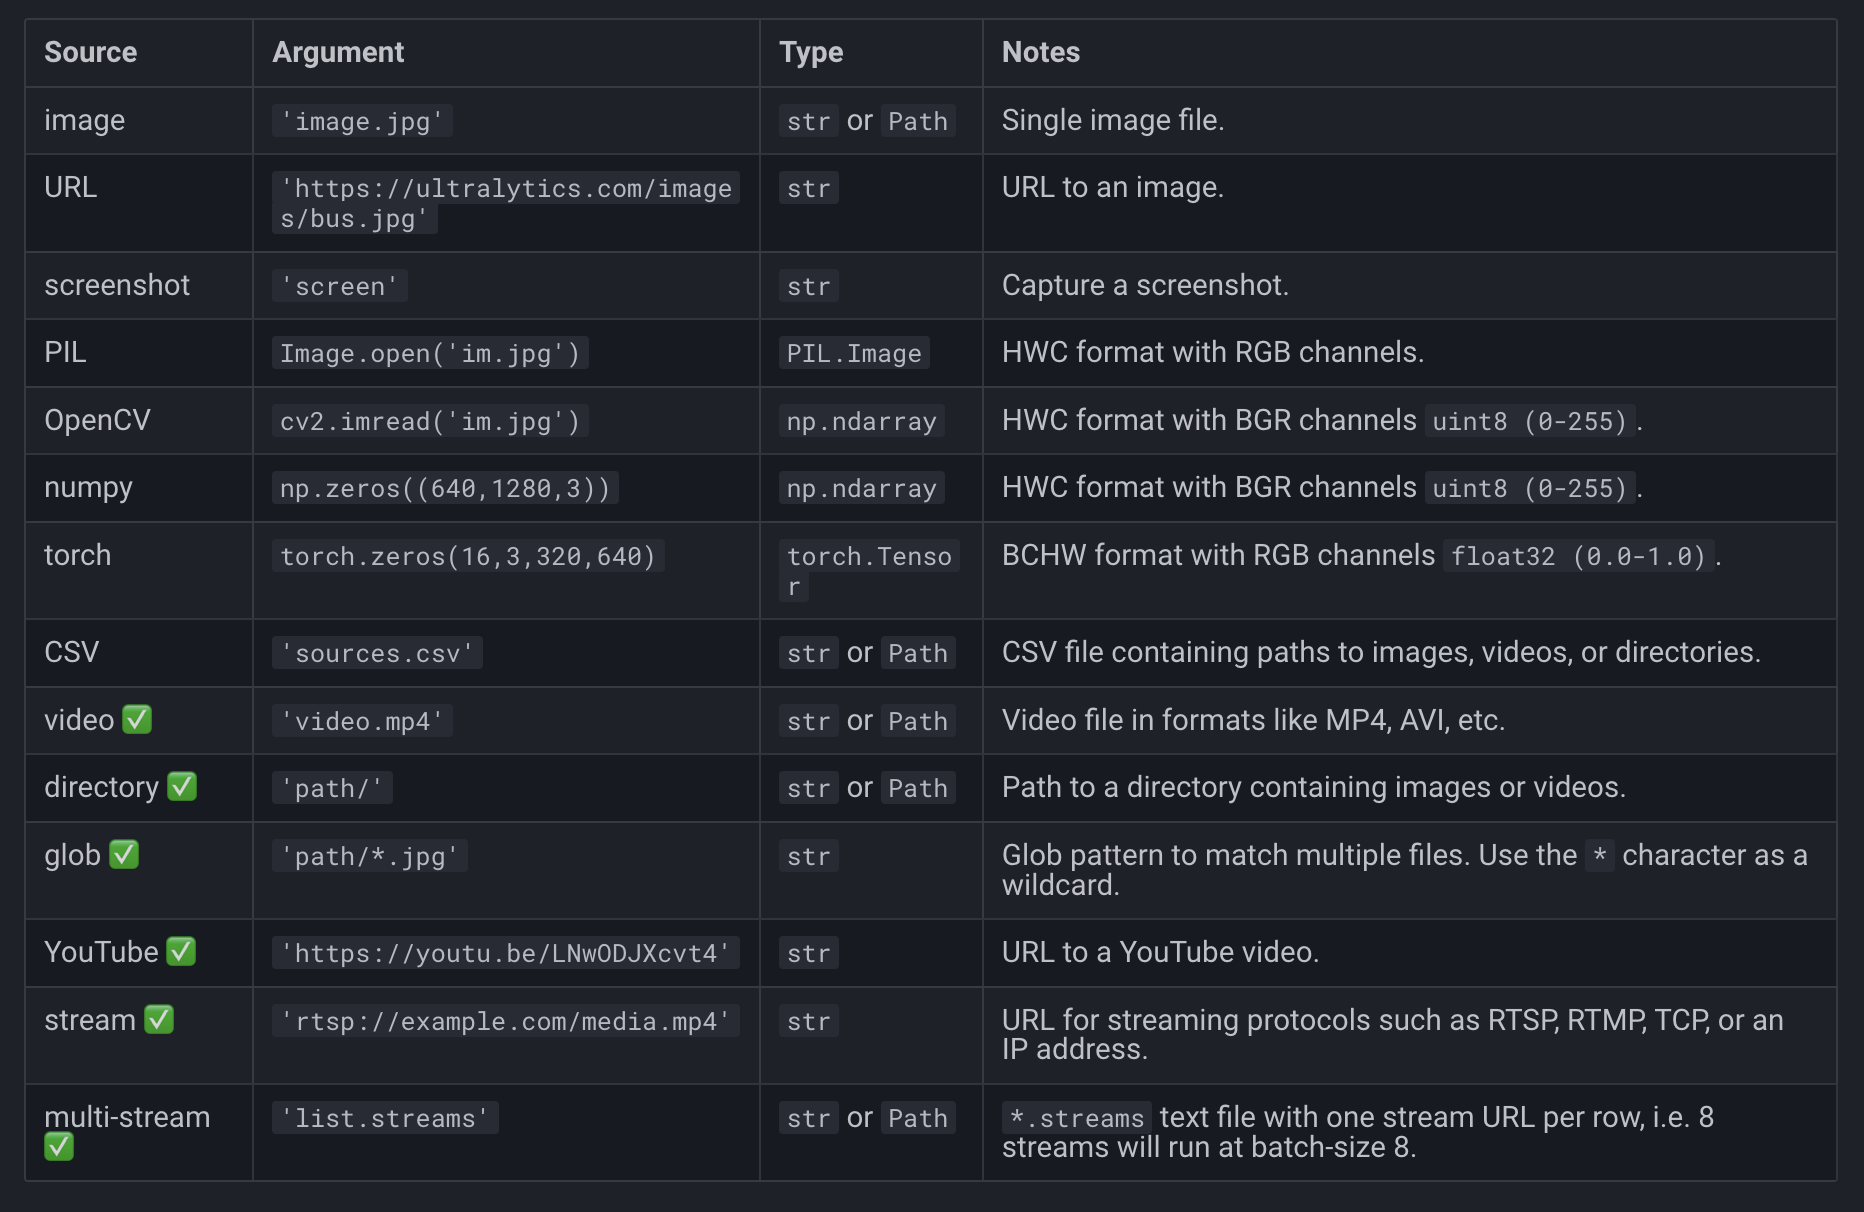

In [22]:
# Specify the minimum confidence threshold
conf=0.5

In [23]:
# Specify the Intersection Over Union (IoU) threshold
# Higher values result in fewer detections by eliminating overlapping boxes, useful for reducing duplicates
iou=0.7 # Default

[Class IDs](https://github.com/ultralytics/ultralytics/blob/main/ultralytics/cfg/datasets/coco.yaml)

In [24]:
# Filters predictions to a set of class IDs
# 56: Chairs
classes=56

[Prediction Docs](https://docs.ultralytics.com/modes/predict/#inference-sources)

### Predictions

In [30]:
# Load a pretrained YOLOv8n model
model = YOLO('yolov8n.pt')

# Make predictions
results = model.predict(source='/Users/luketomlinson/Desktop/scraped-more/More-scraped-701-1000', conf=0.5, iou=0.7, classes=56, save=False, imgsz=640, save_crop=True)


image 1/299 /Users/luketomlinson/Desktop/scraped-more/More-scraped-701-1000/image1000.jpg: 448x640 1 chair, 182.4ms
image 2/299 /Users/luketomlinson/Desktop/scraped-more/More-scraped-701-1000/image701.jpg: 640x448 (no detections), 132.5ms
image 3/299 /Users/luketomlinson/Desktop/scraped-more/More-scraped-701-1000/image702.jpg: 448x640 1 chair, 137.3ms
image 4/299 /Users/luketomlinson/Desktop/scraped-more/More-scraped-701-1000/image703.jpg: 640x640 (no detections), 196.0ms
image 5/299 /Users/luketomlinson/Desktop/scraped-more/More-scraped-701-1000/image704.jpg: 640x640 1 chair, 169.5ms
image 6/299 /Users/luketomlinson/Desktop/scraped-more/More-scraped-701-1000/image705.jpg: 448x640 (no detections), 125.8ms
image 7/299 /Users/luketomlinson/Desktop/scraped-more/More-scraped-701-1000/image706.jpg: 640x544 (no detections), 146.9ms
image 8/299 /Users/luketomlinson/Desktop/scraped-more/More-scraped-701-1000/image707.jpg: 448x640 (no detections), 132.6ms
image 9/299 /Users/luketomlinson/Deskt

In [93]:
# Process results list
for result in results:
    boxes = result.boxes  # Boxes object for bounding box outputs
    masks = result.masks  # Masks object for segmentation masks outputs
    keypoints = result.keypoints  # Keypoints object for pose outputs
    probs = result.probs  # Probs object for classification outputs
    result.show()  # display to screen
    result.save(filename='result.jpg')  # save to disk


image 1/100 /Users/luketomlinson/Desktop/scraped/Scraped_100/image1.jpg: 256x192 1 chair, 31.4ms
image 2/100 /Users/luketomlinson/Desktop/scraped/Scraped_100/image10.jpg: 256x192 1 chair, 22.4ms
image 3/100 /Users/luketomlinson/Desktop/scraped/Scraped_100/image100.jpg: 256x192 18 chairs, 23.8ms
image 4/100 /Users/luketomlinson/Desktop/scraped/Scraped_100/image11.jpg: 256x192 1 chair, 23.1ms
image 5/100 /Users/luketomlinson/Desktop/scraped/Scraped_100/image12.jpg: 256x192 1 chair, 32.2ms
image 6/100 /Users/luketomlinson/Desktop/scraped/Scraped_100/image13.jpg: 256x224 1 chair, 42.7ms
image 7/100 /Users/luketomlinson/Desktop/scraped/Scraped_100/image14.jpg: 256x224 1 chair, 31.5ms
image 8/100 /Users/luketomlinson/Desktop/scraped/Scraped_100/image15.jpg: 256x192 1 chair, 48.8ms
image 9/100 /Users/luketomlinson/Desktop/scraped/Scraped_100/image16.jpg: 256x192 1 chair, 26.4ms
image 10/100 /Users/luketomlinson/Desktop/scraped/Scraped_100/image17.jpg: 256x224 1 chair, 30.7ms
image 11/100 /Us

In [ ]:
# Visualize the results
for i, r in enumerate(results):
    # Plot results image
    im_bgr = r.plot()  # BGR-order numpy array
    im_rgb = Image.fromarray(im_bgr[..., ::-1])  # RGB-order PIL image

    # Show results to screen (in supported environments)
    r.show()

    # Save results to disk
    r.save(filename=f'results{i}.jpg')